In [1]:
# Importando bibliotecas para análise
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import plotly.offline as py
import plotly.graph_objs as go

from scipy.special import boxcox1p

py.init_notebook_mode(connected=True)

In [2]:
slalom1 = pd.read_csv('RaceStudio_15_03_20_Noite_Slalom1_F19_Pedrao.csv')
slalom2 = pd.read_csv('RaceStudio_15_03_20_Noite_Slalom2_F19_Pedrao.csv')
slalom3 = pd.read_csv('RaceStudio_15_03_20_Noite_Slalom3_F19_Pedrao.csv')

In [3]:
slalom1

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
0,0.000,0.000,0.0,0.9,0.0,0.0
1,0.050,0.000,0.0,0.9,0.0,0.0
2,0.100,0.000,0.0,0.9,0.0,0.0
3,0.150,0.000,0.0,0.9,0.0,0.0
4,0.200,0.000,0.0,0.9,0.0,0.0
...,...,...,...,...,...,...
18547,927.350,2.897,0.0,0.0,0.0,0.0
18548,927.400,2.897,0.0,0.0,0.0,0.0
18549,927.450,2.897,0.0,0.0,0.0,0.0
18550,927.500,2.897,0.0,0.0,0.0,0.0


In [4]:
slalom1.shape

(18552, 6)

In [5]:
slalom2

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
0,0.000,0.000,0.0,0.000000,0.0,0.0
1,0.050,0.000,0.0,0.000000,0.0,0.0
2,0.100,0.000,0.0,0.000000,0.0,0.0
3,0.150,0.000,0.0,0.000000,0.0,0.0
4,0.200,0.000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...
8580,429.000,6.188,0.0,0.062137,0.0,0.0
8581,429.050,6.188,0.0,0.062137,0.0,0.0
8582,429.100,6.188,0.0,0.062137,0.0,0.0
8583,429.150,6.188,0.0,0.062137,0.0,0.0


In [6]:
slalom3

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
0,0.000,0.000,0.0,0.000000,0.0,0.0
1,0.050,0.000,0.0,0.000000,0.0,0.0
2,0.100,0.000,0.0,0.000000,0.0,0.0
3,0.150,0.000,0.0,0.000000,0.0,0.0
4,0.200,0.000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...
9401,470.050,7.312,0.0,0.124274,0.0,0.0
9402,470.100,7.312,0.0,0.124274,0.0,0.0
9403,470.150,7.312,0.0,0.124274,0.0,0.0
9404,470.200,7.312,0.0,0.124274,0.0,0.0


In [7]:
#Verificando se há valores Nan nos dataframes
slalom1.dropna()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
0,0.000,0.000,0.0,0.9,0.0,0.0
1,0.050,0.000,0.0,0.9,0.0,0.0
2,0.100,0.000,0.0,0.9,0.0,0.0
3,0.150,0.000,0.0,0.9,0.0,0.0
4,0.200,0.000,0.0,0.9,0.0,0.0
...,...,...,...,...,...,...
18547,927.350,2.897,0.0,0.0,0.0,0.0
18548,927.400,2.897,0.0,0.0,0.0,0.0
18549,927.450,2.897,0.0,0.0,0.0,0.0
18550,927.500,2.897,0.0,0.0,0.0,0.0


In [8]:
slalom2.dropna()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
0,0.000,0.000,0.0,0.000000,0.0,0.0
1,0.050,0.000,0.0,0.000000,0.0,0.0
2,0.100,0.000,0.0,0.000000,0.0,0.0
3,0.150,0.000,0.0,0.000000,0.0,0.0
4,0.200,0.000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...
8580,429.000,6.188,0.0,0.062137,0.0,0.0
8581,429.050,6.188,0.0,0.062137,0.0,0.0
8582,429.100,6.188,0.0,0.062137,0.0,0.0
8583,429.150,6.188,0.0,0.062137,0.0,0.0


In [9]:
slalom3.dropna()

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
0,0.000,0.000,0.0,0.000000,0.0,0.0
1,0.050,0.000,0.0,0.000000,0.0,0.0
2,0.100,0.000,0.0,0.000000,0.0,0.0
3,0.150,0.000,0.0,0.000000,0.0,0.0
4,0.200,0.000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...
9401,470.050,7.312,0.0,0.124274,0.0,0.0
9402,470.100,7.312,0.0,0.124274,0.0,0.0
9403,470.150,7.312,0.0,0.124274,0.0,0.0
9404,470.200,7.312,0.0,0.124274,0.0,0.0


In [10]:
#Convertendo a velocidade dos testes slalom 2 e 3 em mph para km/h (o teste slalom 1 já estava em km/h)
#slalom2['GPS_Speed'] = slalom2['GPS_Speed'].astype(float).multiply(1.609)
slalom2['GPS_Speed'] = slalom2['GPS_Speed'].multiply(1.609)
slalom3['GPS_Speed'] = slalom3['GPS_Speed'].multiply(1.609)

In [11]:
slalom2

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
0,0.000,0.000,0.0,0.000000,0.0,0.0
1,0.050,0.000,0.0,0.000000,0.0,0.0
2,0.100,0.000,0.0,0.000000,0.0,0.0
3,0.150,0.000,0.0,0.000000,0.0,0.0
4,0.200,0.000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...
8580,429.000,6.188,0.0,0.099978,0.0,0.0
8581,429.050,6.188,0.0,0.099978,0.0,0.0
8582,429.100,6.188,0.0,0.099978,0.0,0.0
8583,429.150,6.188,0.0,0.099978,0.0,0.0


In [12]:
slalom3

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
0,0.000,0.000,0.0,0.000000,0.0,0.0
1,0.050,0.000,0.0,0.000000,0.0,0.0
2,0.100,0.000,0.0,0.000000,0.0,0.0
3,0.150,0.000,0.0,0.000000,0.0,0.0
4,0.200,0.000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...
9401,470.050,7.312,0.0,0.199957,0.0,0.0
9402,470.100,7.312,0.0,0.199957,0.0,0.0
9403,470.150,7.312,0.0,0.199957,0.0,0.0
9404,470.200,7.312,0.0,0.199957,0.0,0.0


In [13]:
#Filtrando valores abaixo de 3000 RPM
slalom1gg = slalom1[slalom1['RPM']>=3000]
slalom2gg = slalom2[slalom2['RPM']>=3000]
slalom3gg = slalom3[slalom3['RPM']>=3000]

In [14]:
slalom1gg

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
69,3.45,0.001,3063.387207,0.900000,0.000000,0.000000
70,3.50,0.001,3443.774658,0.900000,0.000000,0.000000
71,3.55,0.001,3692.849121,0.900000,0.000000,0.000000
72,3.60,0.001,3971.496582,0.900000,0.000000,0.000000
73,3.65,0.001,4318.726074,0.900000,0.000000,0.000000
...,...,...,...,...,...,...
17608,880.40,2.883,3355.276611,19.337000,-0.038188,-0.285852
17609,880.45,2.884,3233.372314,18.787001,-0.013970,-0.236141
17610,880.50,2.884,3146.867676,18.402000,-0.000898,-0.191267
17611,880.55,2.884,3119.883301,18.101999,0.006431,-0.148885


In [15]:
slalom2gg

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
79,3.95,0.000,3259.691406,0.000000,0.000000,0.000000
80,4.00,0.000,3453.730469,0.000000,0.000000,0.000000
81,4.05,0.000,3559.015137,0.000000,0.000000,0.000000
82,4.10,0.000,3624.339600,0.000000,0.000000,0.000000
83,4.15,0.000,3722.200195,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
8270,413.50,6.120,3074.166016,18.074138,0.019152,-0.042210
8271,413.55,6.121,3067.399414,17.974158,0.004812,-0.039979
8272,413.60,6.122,3059.498535,17.885176,-0.007355,-0.041955
8273,413.65,6.123,3052.438965,17.834190,-0.011905,-0.059182


In [16]:
slalom3gg

,Time,Distance,RPM,GPS_Speed,GPS_LatAcc,GPS_LonAcc
78,3.90,0.000,3013.376709,0.142136,0.000000,0.000000
79,3.95,0.000,3021.388916,0.146302,0.000000,0.000000
80,4.00,0.000,3025.888916,0.150551,0.000000,0.000000
81,4.05,0.000,3023.686279,0.154717,0.000000,0.000000
84,4.20,0.000,3015.406738,0.167214,0.000000,0.000000
...,...,...,...,...,...,...
9039,451.95,7.269,4545.390625,37.412000,0.002422,-0.222649
9040,452.00,7.270,4230.383301,37.012088,-0.026512,-0.278414
9041,452.05,7.272,3882.234619,36.612174,-0.063477,-0.345652
9042,452.10,7.273,3575.584961,35.897326,-0.086166,-0.395267


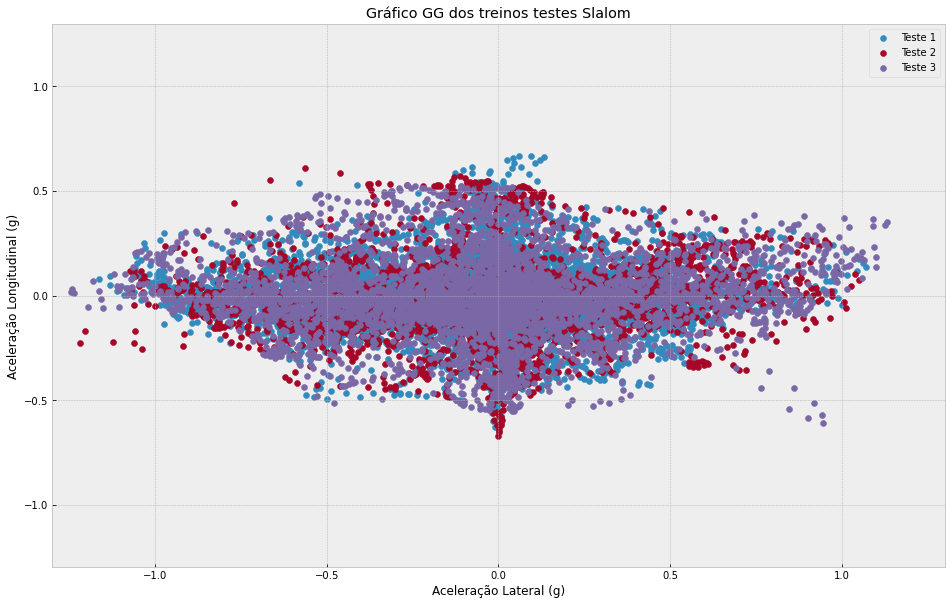

In [48]:
#Gráficos GG Aceleração Lateral x Aceleração Longitudinal

plt.scatter(slalom1gg['GPS_LatAcc'], slalom1gg['GPS_LonAcc']*-1, label="Teste 1")
plt.scatter(slalom2gg['GPS_LatAcc'], slalom2gg['GPS_LonAcc']*-1, label="Teste 2")
plt.scatter(slalom3gg['GPS_LatAcc'], slalom3gg['GPS_LonAcc']*-1, label="Teste 3")
plt.title('Gráfico GG dos treinos testes Slalom')
plt.xlabel('Aceleração Lateral (g)')
plt.ylabel('Aceleração Longitudinal (g)')
plt.legend()
plt.rcParams['figure.figsize'] = (16,10)
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.style.use('bmh')
#plt.show()
plt.savefig('GráficoGG.png')

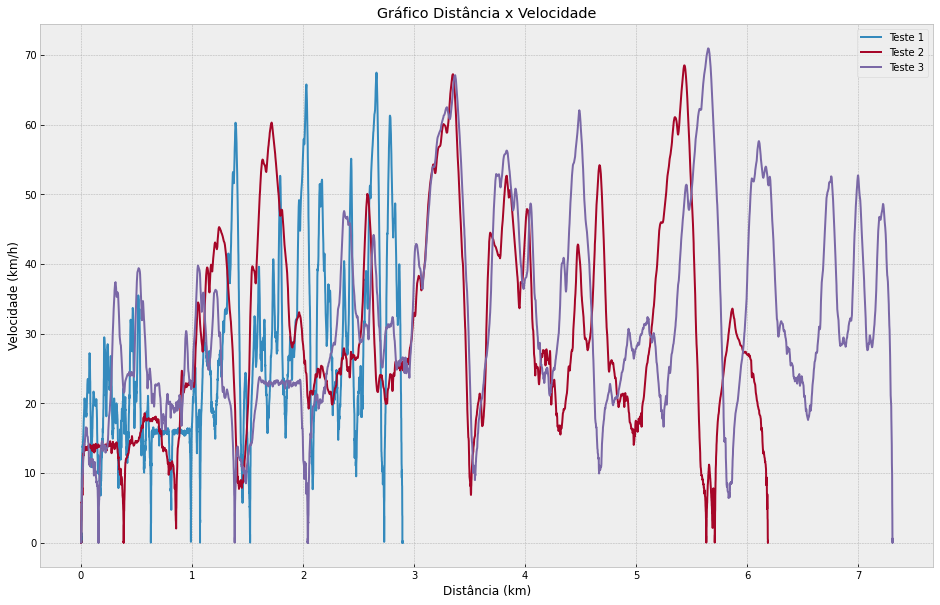

In [49]:
#Gráficos Distância x Velocidade

plt.plot(slalom1['Distance'], slalom1['GPS_Speed'], label="Teste 1")
plt.plot(slalom2['Distance'], slalom2['GPS_Speed'], label="Teste 2")
plt.plot(slalom3['Distance'], slalom3['GPS_Speed'], label="Teste 3")
plt.title('Gráfico Distância x Velocidade')
plt.xlabel('Distância (km)')
plt.ylabel('Velocidade (km/h)')
plt.legend()
plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('bmh')
#plt.show()
plt.savefig('GráficoDist_Vel.png')


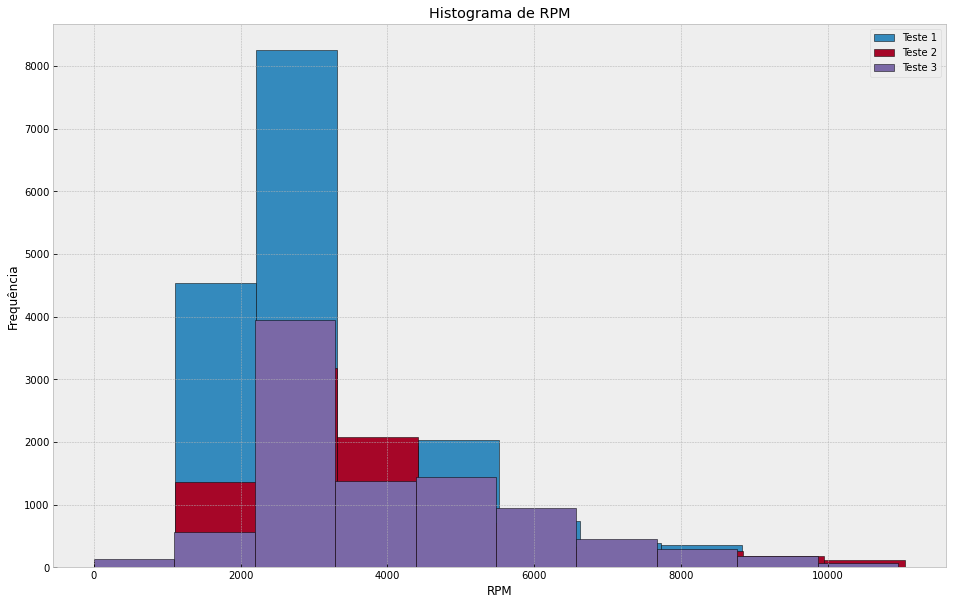

In [50]:
#Histogramas de RPM
plt.hist(slalom1['RPM'], edgecolor = 'k', bins = 10, label = "Teste 1")
plt.hist(slalom2['RPM'], edgecolor = 'k', bins = 10, label = "Teste 2")
plt.hist(slalom3['RPM'], edgecolor = 'k', bins = 10, label = "Teste 3")
plt.title('Histograma de RPM')
plt.xlabel('RPM')
plt.ylabel('Frequência')
plt.legend()
plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('bmh')
#plt.show()
plt.savefig('HistogramaRPM.png')

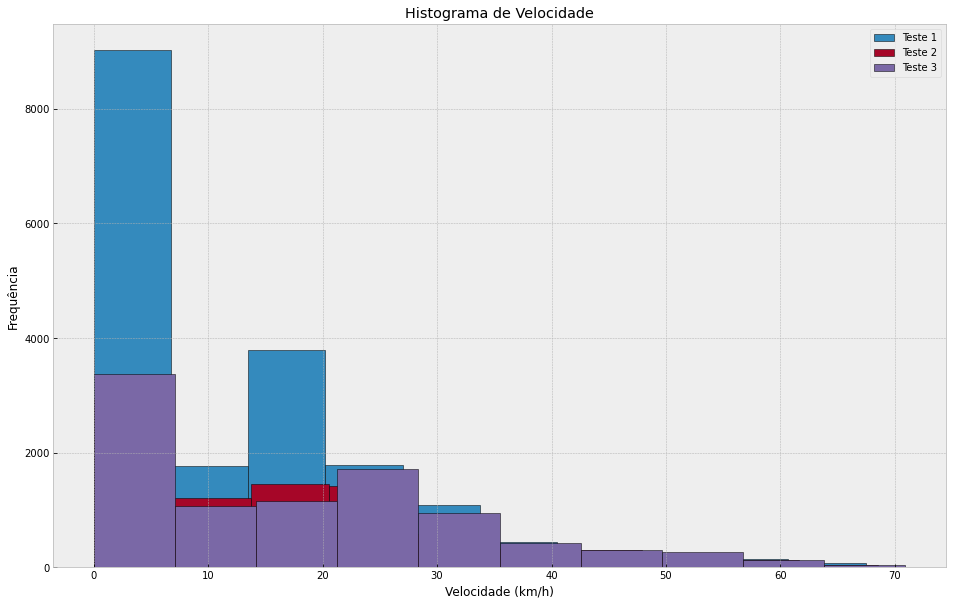

In [51]:
#Histogramas de Velocidade
plt.hist(slalom1['GPS_Speed'], edgecolor = 'k', bins = 10, label = "Teste 1")
plt.hist(slalom2['GPS_Speed'], edgecolor = 'k', bins = 10, label = "Teste 2")
plt.hist(slalom3['GPS_Speed'], edgecolor = 'k', bins = 10, label = "Teste 3")
plt.title('Histograma de Velocidade')
plt.xlabel('Velocidade (km/h)')
plt.ylabel('Frequência')
plt.legend()
plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('bmh')
#plt.show()
plt.savefig('HistogramaVel.png')

In [22]:
temp1 = pd.read_csv('Temperaturas1.csv')
temp2 = pd.read_csv('Temperaturas2.csv')
temp3 = pd.read_csv('Temperaturas3.csv')

In [23]:
temp1

,Tempo,Temperatura
0,1000,24.71
1,2000,39.84
2,3000,52.05
3,4000,66.70
4,5000,73.05
...,...,...
235,236000,56.93
236,237000,68.65
237,238000,53.03
238,239000,81.84


In [24]:
temp2

,Tempo,Temperatura
0,1000,29.10
1,2000,31.05
2,3000,41.80
3,4000,39.84
4,5000,9.08
...,...,...
235,236000,-1.17
236,237000,25.68
237,238000,41.80
238,239000,54.00


In [25]:
temp3

,Tempo,Temperatura
0,1000,24.71
1,2000,32.03
2,3000,38.87
3,4000,55.96
4,5000,96.97
...,...,...
235,236000,19.82
236,237000,51.07
237,238000,56.93
238,239000,36.91


In [26]:
temp1.describe()

,Tempo,Temperatura
count,240.000000,240.000000
mean,120500.000000,51.601208
std,69426.219831,40.847903
min,1000.000000,-40.230000
25%,60750.000000,22.750000
50%,120500.000000,54.980000
75%,180250.000000,84.770000
max,240000.000000,124.800000


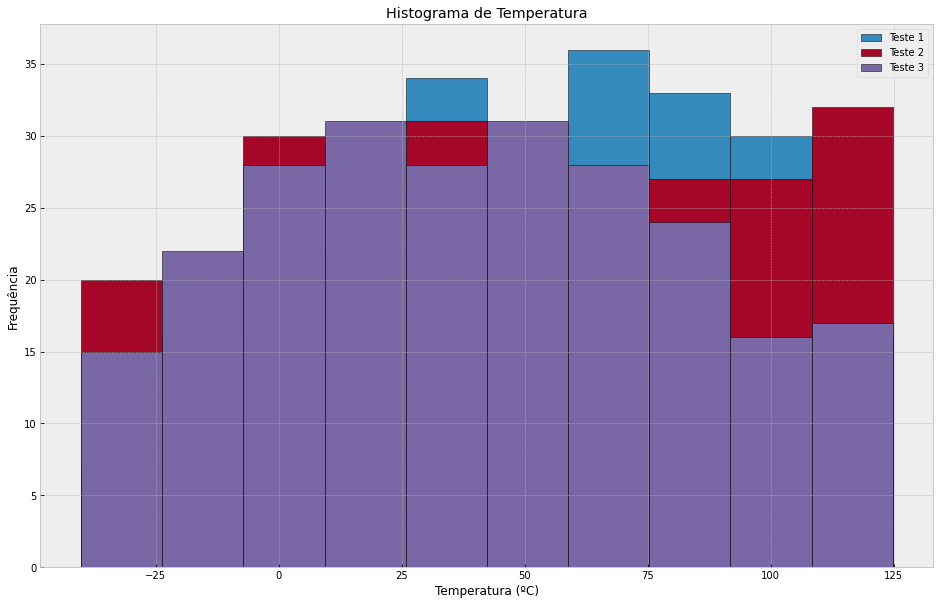

In [52]:
#Histogramas de Temperatura
plt.hist(temp1['Temperatura'], edgecolor = 'k', bins = 10, label = "Teste 1")
plt.hist(temp2['Temperatura'], edgecolor = 'k', bins = 10, label = "Teste 2")
plt.hist(temp3['Temperatura'], edgecolor = 'k', bins = 10, label = "Teste 3")
plt.title('Histograma de Temperatura')
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequência')
plt.legend()
plt.rcParams['figure.figsize'] = (16,10)
#plt.show()
plt.savefig('HistogramaTemp.png')

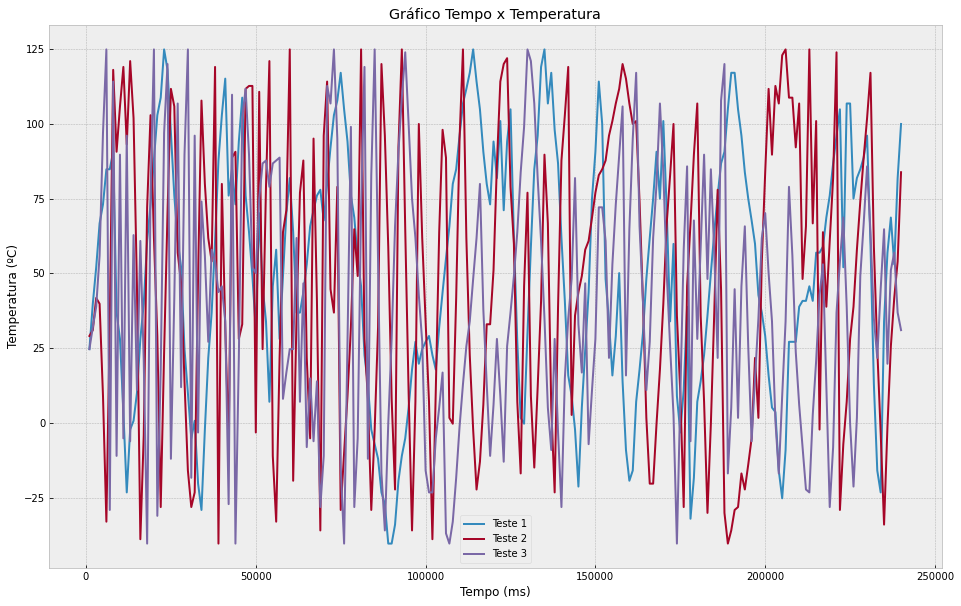

In [53]:
#Gráficos Tempo x Temperatura

plt.plot(temp1['Tempo'], temp1['Temperatura'], label="Teste 1")
plt.plot(temp2['Tempo'], temp2['Temperatura'], label="Teste 2")
plt.plot(temp3['Tempo'], temp3['Temperatura'], label="Teste 3")
plt.title('Gráfico Tempo x Temperatura')
plt.xlabel('Tempo (ms)')
plt.ylabel('Temperatura (ºC)')
plt.legend()
plt.rcParams['figure.figsize'] = (16,10)
#plt.show()
plt.savefig('GráficoTempo_Temp.png')

In [41]:
#Velocidades máximas

vel_max1 = round(slalom1['GPS_Speed'].max(),5)
vel_max2 = round(slalom2['GPS_Speed'].max(),5)
vel_max3 = round(slalom3['GPS_Speed'].max(),5)
vel_max_total = max(vel_max1, vel_max2, vel_max3)

print(vel_max1)
print(vel_max2)
print(vel_max3)
print(vel_max_total)

67.452
68.48936
70.92884
70.92884


In [42]:
#Acelerações laterais e longitudinais máximas e mínimas
#adicionar índice dos valores totais (qual teste foi o maior)

acc_lat_max1 = round(slalom1['GPS_LatAcc'].max(),5)
acc_lat_min1 = round(slalom1['GPS_LatAcc'].min(),5)
acc_lon_max1 = round(slalom1['GPS_LonAcc'].max(),5)
acc_lon_min1 = round(slalom1['GPS_LonAcc'].min(),5)

acc_lat_max2 = round(slalom2['GPS_LatAcc'].max(),5)
acc_lat_min2 = round(slalom2['GPS_LatAcc'].min(),5)
acc_lon_max2 = round(slalom2['GPS_LonAcc'].max(),5)
acc_lon_min2 = round(slalom2['GPS_LonAcc'].min(),5)

acc_lat_max3 = round(slalom3['GPS_LatAcc'].max(),5)
acc_lat_min3 = round(slalom3['GPS_LatAcc'].min(),5)
acc_lon_max3 = round(slalom3['GPS_LonAcc'].max(),5)
acc_lon_min3 = round(slalom3['GPS_LonAcc'].min(),5)

acc_lat_max_total = max(acc_lat_max1, acc_lat_max2, acc_lat_max3)
acc_lat_min_total = min(acc_lat_min1, acc_lat_min2, acc_lat_min3)
acc_lon_max_total = max(acc_lon_max1, acc_lon_max2, acc_lon_max3)
acc_lon_min_total = min(acc_lon_min1, acc_lon_min2, acc_lon_min3)

print('Acc Lateral máxima teste 1: {}'.format(acc_lat_max1))
print('Acc Lateral mínima teste 1: {}'.format(acc_lat_min1))
print('Acc Longitudinal máxima teste 1: {}'.format(acc_lon_max1))
print('Acc Longitudinal mínima teste 1: {}'.format(acc_lon_min1))
print('Acc Lateral máxima teste 2: {}'.format(acc_lat_max2))
print('Acc Lateral mínima teste 2: {}'.format(acc_lat_min2))
print('Acc Longitudinal máxima teste 2: {}'.format(acc_lon_max2))
print('Acc Longitudinal mínima teste 2: {}'.format(acc_lon_min2))
print('Acc Lateral máxima teste 3: {}'.format(acc_lat_max3))
print('Acc Lateral mínima teste 3: {}'.format(acc_lat_min3))
print('Acc Longitudinal máxima teste 3: {}'.format(acc_lon_max3))
print('Acc Longitudinal mínima teste 3: {}'.format(acc_lon_min3))
print('Acc Lateral máxima total: {}'.format(acc_lat_max_total))
print('Acc Lateral mínima total: {}'.format(acc_lat_min_total))
print('Acc Longitudinal máxima total: {}'.format(acc_lon_max_total))
print('Acc Longitudinal mínima total: {}'.format(acc_lon_min_total))


Acc Lateral máxima teste 1: 1.0691
Acc Lateral mínima teste 1: -1.16352
Acc Longitudinal máxima teste 1: 0.63211
Acc Longitudinal mínima teste 1: -0.66564
Acc Lateral máxima teste 2: 1.05074
Acc Lateral mínima teste 2: -1.21844
Acc Longitudinal máxima teste 2: 0.67166
Acc Longitudinal mínima teste 2: -0.60967
Acc Lateral máxima teste 3: 1.13247
Acc Lateral mínima teste 3: -1.24394
Acc Longitudinal máxima teste 3: 0.60816
Acc Longitudinal mínima teste 3: -0.67918
Acc Lateral máxima total: 1.13247
Acc Lateral mínima total: -1.24394
Acc Longitudinal máxima total: 0.67166
Acc Longitudinal mínima total: -0.67918


In [43]:
#RPMs máximos

rpm_max1 = round(slalom1['RPM'].max(),5)
rpm_max2 = round(slalom2['RPM'].max(),5)
rpm_max3 = round(slalom3['RPM'].max(),5)
rpm_max_total = max(rpm_max1, rpm_max2, rpm_max3)

print(rpm_max1)
print(rpm_max2)
print(rpm_max3)
print(rpm_max_total)

11040.16406
11061.26172
10962.14746
11061.26172


In [32]:
#Temperaturas máximas e mínimas

temp_max1 = temp1['Temperatura'].max()
temp_min1 = temp1['Temperatura'].min()

temp_max2 = temp2['Temperatura'].max()
temp_min2 = temp2['Temperatura'].min()

temp_max3 = temp3['Temperatura'].max()
temp_min3 = temp3['Temperatura'].min()

temp_max_total = max(temp_max1, temp_max2, temp_max3)
temp_min_total = min(temp_min1, temp_min2, temp_min3)

print(temp_max1)
print(temp_min1)
print(temp_max2)
print(temp_min2)
print(temp_max3)
print(temp_min3)
print(temp_max_total)
print(temp_min_total)


124.8
-40.23
124.8
-40.23
124.8
-40.23
124.8
-40.23


In [62]:
#Médias de velocidade, acelerações lateral e longitudinal, RPM e temperaturas com respectivos desvios padrão
#terminar

vel_media1 = round(slalom1['GPS_Speed'].mean(),3)
vel_dp1 = round(slalom1['GPS_Speed'].std(),3)

vel_media2 = round(slalom2['GPS_Speed'].mean(),3)
vel_dp2 = round(slalom2['GPS_Speed'].std(),3)

vel_media3 = round(slalom3['GPS_Speed'].mean(),3)
vel_dp3 = round(slalom3['GPS_Speed'].std(),3)


acc_lat_media1 = round(slalom1['GPS_LatAcc'].mean(),3)
acc_lon_media1 = round(slalom1['GPS_LonAcc'].mean(),3)
acc_lat_dp1 = round(slalom1['GPS_LatAcc'].std(),3)
acc_lon_dp1 = round(slalom1['GPS_LonAcc'].std(),3)

acc_lat_media2 = round(slalom2['GPS_LatAcc'].mean(),3)
acc_lon_media2 = round(slalom2['GPS_LonAcc'].mean(),3)
acc_lat_dp2 = round(slalom2['GPS_LatAcc'].std(),3)
acc_lon_dp2 = round(slalom2['GPS_LonAcc'].std(),3)

acc_lat_media3 = round(slalom3['GPS_LatAcc'].mean(),3)
acc_lon_media3 = round(slalom3['GPS_LonAcc'].mean(),3)
acc_lat_dp3 = round(slalom3['GPS_LatAcc'].std(),3)
acc_lon_dp3 = round(slalom3['GPS_LonAcc'].std(),3)


rpm_media1 = round(slalom1['RPM'].mean(),3)
rpm_dp1 = round(slalom1['RPM'].std(),3)

rpm_media2 = round(slalom2['RPM'].mean(),3)
rpm_dp2 = round(slalom1['RPM'].std(),3)

rpm_media3 = round(slalom3['RPM'].mean(),3)
rpm_dp3 = round(slalom1['RPM'].std(),3)


temp_media1 = round(temp1['Temperatura'].mean(),3)
temp_dp1 = round(temp1['Temperatura'].std(),3)

temp_media2 = round(temp2['Temperatura'].mean(),3)
temp_dp2 = round(temp2['Temperatura'].std(),3)

temp_media3 = round(temp3['Temperatura'].mean(),3)
temp_dp3 = round(temp3['Temperatura'].std(),3)

print(vel_media1)
print(vel_dp1)
print(vel_media2)
print(vel_dp2)
print(vel_media3)
print(vel_dp3)
print(acc_lat_media1)
print(acc_lon_media1)
print(acc_lat_dp1)
print(acc_lon_dp1)
print(acc_lat_media2)
print(acc_lon_media2)
print(acc_lat_dp2)
print(acc_lon_dp2)
print(acc_lat_media3)
print(acc_lon_media3)
print(acc_lat_dp3)
print(acc_lon_dp3)
print(rpm_media1)
print(rpm_dp1)
print(rpm_media2)
print(rpm_dp2)
print(rpm_media3)
print(rpm_dp3)
print(temp_media1)
print(temp_dp1)
print(temp_media2)
print(temp_dp2)
print(temp_media3)
print(temp_dp3)

11.235
13.228
15.784
14.924
17.029
16.021
-0.01
-0.0
0.215
0.102
-0.013
-0.0
0.259
0.124
-0.011
-0.0
0.287
0.137
3197.611
1597.348
3614.913
1597.348
3909.659
1597.348
51.601
40.848
49.007
48.338
40.812
43.386


In [33]:
#Distâncias percorridas e maior distância

dist1 = slalom1['Distance'][slalom1.shape[0] -1]
dist2 = slalom2['Distance'][slalom2.shape[0] -1]
dist3 = slalom3['Distance'][slalom3.shape[0] -1]
dist_max = max(dist1, dist2, dist3)

print(dist1)
print(dist2)
print(dist3)
print(dist_max)

2.897
6.188
7.312
7.312
